<a href="https://colab.research.google.com/github/shirisharchive/Binary-Decimal-Binary/blob/main/liver_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing all the necessary libraries**

In [759]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

**Reading the csv file using panda**

In [760]:
liver_df=pd.read_csv("Liver_disease_data.csv")
liver_data=liver_df.copy()

In [761]:
liver_df.head()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1


*Let understand the terms present here.*


Age: Range: 20 to 80 years.

Gender: Male (0) or Female (1).

BMI (Body Mass Index): Range: 15 to 40.

Alcohol Consumption: Range: 0 to 20 units per week.

Smoking: No (0) or Yes (1).

Genetic Risk: Low (0), Medium (1), High (2).

Physical Activity: Range: 0 to 10 hours per week.

Diabetes: No (0) or Yes (1).

Hypertension: No (0) or Yes (1).

Liver Function Test: Range: 20 to 100.

Diagnosis: Binary indicator (0 or 1) of liver disease presence.

In [762]:
display(liver_df.iloc[160:190])

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
160,63,0,18.117851,5.055969,0,1,8.329316,0,0,53.932449,0
161,59,0,24.634397,18.777899,1,1,7.427215,0,1,87.980244,1
162,41,1,31.084129,17.879704,0,0,8.465612,0,0,44.958272,0
163,46,0,34.509994,6.749607,0,0,0.638664,0,0,85.397228,0
164,54,0,20.430227,14.589275,1,2,0.316200,0,0,29.781828,1
165,20,0,18.445572,11.464464,0,0,2.585006,0,0,34.623083,0
166,54,0,31.576050,6.752986,0,1,9.006661,0,0,96.067333,0
167,56,0,15.046997,19.770433,0,0,8.236593,0,1,87.395799,1
168,66,1,19.459315,0.504747,1,1,6.827273,0,0,51.031912,1
169,33,1,15.726785,5.052921,1,0,7.007587,0,0,71.076516,0


Let's analyze the size of data we have.

df.shape -> returns the tuple with (rows,columns).


In [763]:
liver_df.shape

(1700, 11)

In [764]:
rows = liver_df.shape[0]   # number of rows
cols = liver_df.shape[1]   # number of columns

print("Rows:", rows)
print("Columns:", cols)


Rows: 1700
Columns: 11


In [765]:
print(liver_df.columns)
len(liver_df.columns)

Index(['Age', 'Gender', 'BMI', 'AlcoholConsumption', 'Smoking', 'GeneticRisk',
       'PhysicalActivity', 'Diabetes', 'Hypertension', 'LiverFunctionTest',
       'Diagnosis'],
      dtype='object')


11

Let's have a overlook of the statistics of the data.

df.describe() =>

 is a summary statistics function that help us for insights of the statistical overview of our df.

In [766]:
liver_df.describe()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,50.394118,0.504118,27.699801,9.832309,0.291765,0.521765,5.000993,0.142353,0.154706,59.863867,0.550588
std,17.641915,0.500130,7.210400,5.757472,0.454708,0.666262,2.847074,0.349515,0.361730,22.996262,0.497581
min,20.000000,0.000000,15.004710,0.003731,0.000000,0.000000,0.001852,0.000000,0.000000,20.019254,0.000000
25%,35.000000,0.000000,21.455414,4.841811,0.000000,0.000000,2.622121,0.000000,0.000000,40.024216,0.000000
50%,51.000000,1.000000,27.925367,9.828195,0.000000,0.000000,5.022883,0.000000,0.000000,59.513146,1.000000
75%,66.000000,1.000000,33.957668,14.871671,1.000000,1.000000,7.401642,0.000000,0.000000,79.428755,1.000000
max,80.000000,1.000000,39.992845,19.952456,1.000000,2.000000,9.994964,1.000000,1.000000,99.991413,1.000000


In [767]:
liver_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1700 non-null   int64  
 1   Gender              1700 non-null   int64  
 2   BMI                 1700 non-null   float64
 3   AlcoholConsumption  1700 non-null   float64
 4   Smoking             1700 non-null   int64  
 5   GeneticRisk         1700 non-null   int64  
 6   PhysicalActivity    1700 non-null   float64
 7   Diabetes            1700 non-null   int64  
 8   Hypertension        1700 non-null   int64  
 9   LiverFunctionTest   1700 non-null   float64
 10  Diagnosis           1700 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 146.2 KB


In [768]:
liver_df.dtypes

,0
Age,int64
Gender,int64
BMI,float64
AlcoholConsumption,float64
Smoking,int64
GeneticRisk,int64
PhysicalActivity,float64
Diabetes,int64
Hypertension,int64
LiverFunctionTest,float64


In this way we can describe the categorical data statistics.

In [769]:
liver_df.describe(include='int64')

,Age,Gender,Smoking,GeneticRisk,Diabetes,Hypertension,Diagnosis
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,50.394118,0.504118,0.291765,0.521765,0.142353,0.154706,0.550588
std,17.641915,0.500130,0.454708,0.666262,0.349515,0.361730,0.497581
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,66.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,80.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000


**Let's check either there is presence of any null value in our dataset**

In [770]:
liver_df.isna()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1695,False,False,False,False,False,False,False,False,False,False,False
1696,False,False,False,False,False,False,False,False,False,False,False
1697,False,False,False,False,False,False,False,False,False,False,False
1698,False,False,False,False,False,False,False,False,False,False,False


In [771]:
liver_df.isna().sum()

,0
Age,0
Gender,0
BMI,0
AlcoholConsumption,0
Smoking,0
GeneticRisk,0
PhysicalActivity,0
Diabetes,0
Hypertension,0
LiverFunctionTest,0


In [772]:
liver_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1695,False
1696,False
1697,False
1698,False


In [773]:
liver_df[liver_df.duplicated()]

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis


**Let's visualize the data through EDA**

We have these features mean while **Diagnosis** is target.

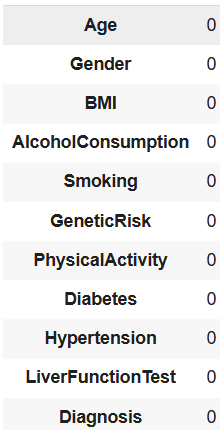

Let's analyze the relationship between these features and make hypothesis for better feature extraction.

**Age vs Gender**

From the graph, we can see the age distribution is from 20 to 80 years old.

0 = Male and 1= Female

And we see, almost the male and female are equally distributed if we consider their age.

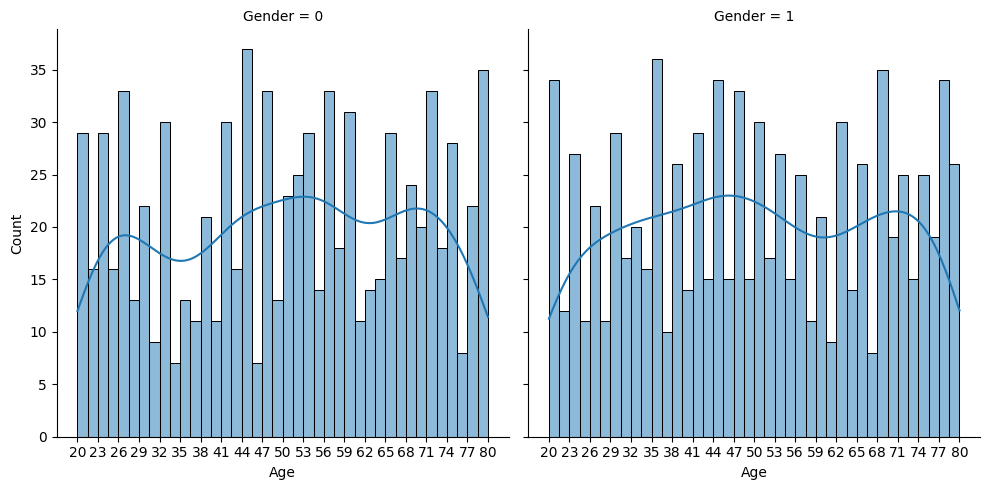

In [774]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# distribution of Age separated by Gender
g = sns.displot(
    data=liver_df,
    x="Age",       # numerical column
    col="Gender",  # categorical column
    kde=True,    #kernel density estimation
    bins=40       #splits data in50 equal intervals
)

# Add custom x-axis ticks (every 5 years here)
for ax in g.axes.flatten():
    ax.set_xticks(np.arange(liver_df["Age"].min(), liver_df["Age"].max()+1, 3))

plt.show()


**Age and Gender vs Smoking**

Let us see the distribution of the smoking for the age and gender. If we see the plot the ratio of non smoker is greater than the smoker.

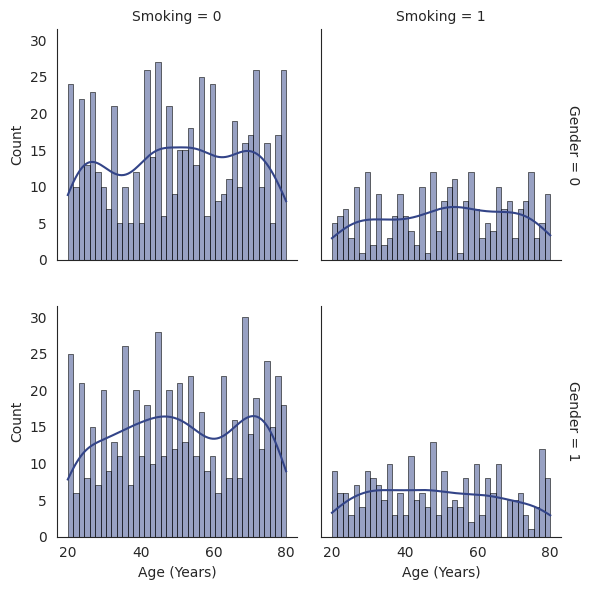

In [775]:


with sns.axes_style("white"):
    g = sns.FacetGrid(
        liver_df,
        row="Gender",      # separate rows by Gender
        col="Smoking",     # separate columns by Smoking status
        margin_titles=True,
        height=3
    )

g.map(sns.histplot, "Age", bins=40, kde=True, color="#334488")

g.set_axis_labels("Age (Years)", "Count")
g.figure.subplots_adjust(wspace=0.1, hspace=0.2)
plt.show()


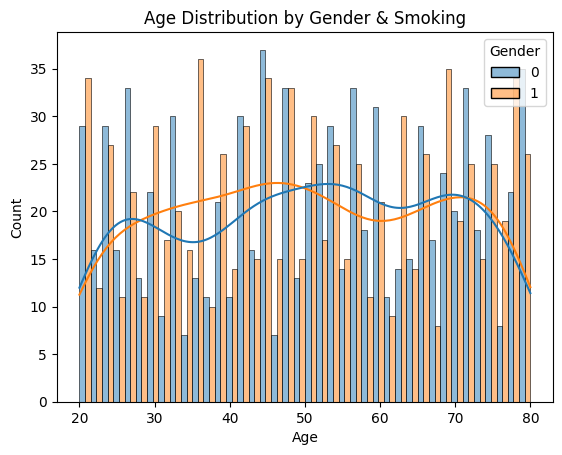

In [776]:
sns.histplot(
    data=liver_df,
    x="Age",
    hue="Gender",       # color by gender
    multiple="dodge",   # separate bars
    kde=True,
    bins=40
).set(title="Age Distribution by Gender & Smoking")

plt.show()


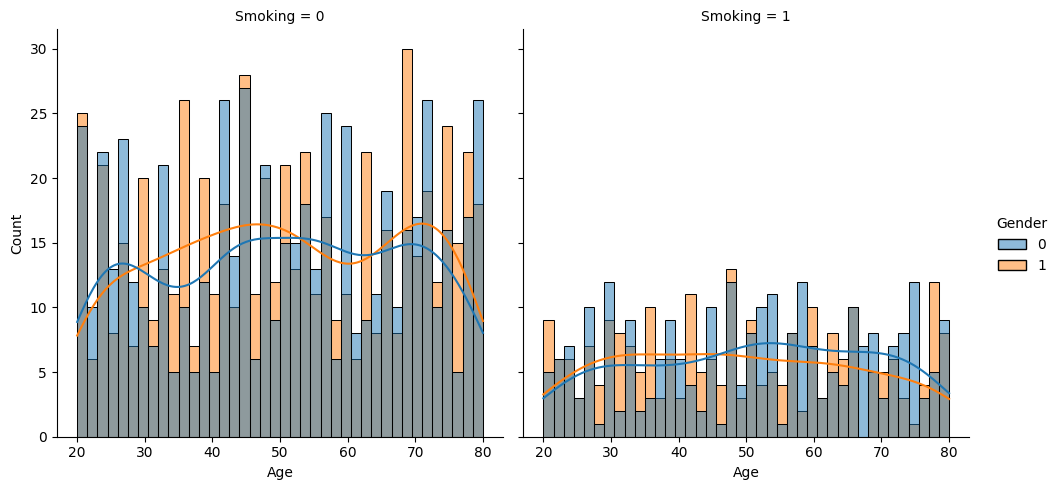

In [777]:
sns.displot(
    data=liver_df,
    x="Age",
    hue="Gender",
    col="Smoking",
    kde=True,
    bins=40
)
plt.show()


In [778]:
from scipy.stats import ttest_ind
import numpy as np

# Split groups
smokers = liver_df[liver_df['Smoking']==1]['Age'].dropna()
non_smokers = liver_df[liver_df['Smoking']==0]['Age'].dropna()

# Perform t-test
t_stat, p_value = ttest_ind(smokers, non_smokers)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Calculate Cohen's d
mean_diff = smokers.mean() - non_smokers.mean()
pooled_std = np.sqrt((smokers.std()**2 + non_smokers.std()**2) / 2)
cohen_d = mean_diff / pooled_std
print("Cohen's d:", cohen_d)


t-statistic: -0.5638650861553451
p-value: 0.5729204140973942
Cohen's d: -0.030238698210772137


**Gender vs Smoking**

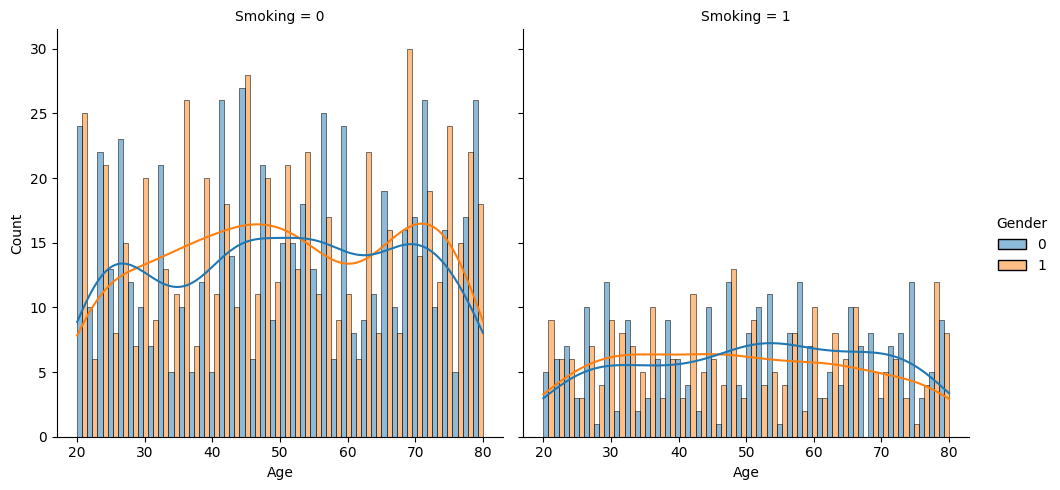

In [779]:

sns.displot(
    data=liver_df,
    x="Age",
    hue="Gender",
    col="Smoking",
    kde=True,
    bins=40,
    multiple="dodge"
)
plt.show()


In [780]:
plt = px.pie(liver_df,
             names=liver_df['Gender'].map({1: 'Female', 0: 'Male'}),
             title="Gender Distribution",
           )

plt.update_layout(
    title_x=0.5,

    width=800,
    height=600
)

plt.show()

In [781]:
import pandas as pd
import plotly.express as px


gender_map = {1: 'Female', 0: 'Male'}
smoking_map = {0: 'Non-Smoker', 1: 'Smoker'}

liver_df['Gender'] = liver_df['Gender'].map(gender_map) if liver_df['Gender'].dtype != object else liver_df['Gender']
liver_df['Smoking'] = liver_df['Smoking'].map(smoking_map) if liver_df['Smoking'].dtype != object else liver_df['Smoking']

# Create combined category
liver_df['Gender_Smoking'] = liver_df['Gender'] + " / " + liver_df['Smoking']

# Count each group
group_counts = liver_df['Gender_Smoking'].value_counts().reset_index()
group_counts.columns = ['Group', 'Count']

# Plot pie chart
fig = px.pie(
    group_counts,
    names='Group',
    values='Count',
    title=" Gender & Smoking Status"
)

# Layout customization
fig.update_layout(
    title_x=0.5,
    width=800,
    height=600
)

fig.show()


In [782]:
bins = [0, 18.5, 25, 30, 35, np.inf]
names = ['Underweight', 'Normal weight', 'Overweight', 'Obese', 'Extremly Obese']
liver_df['SegmentBMI'] = pd.cut(liver_df['BMI'],bins, labels=names)
liver_df.drop('BMI',axis=1,inplace=True)
liver_df.head()

,Age,Gender,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis,Gender_Smoking,SegmentBMI
0,58,Male,17.272828,Non-Smoker,1,0.658940,0,0,42.734240,1,Male / Non-Smoker,Extremly Obese
1,71,Female,2.201266,Non-Smoker,1,1.670557,1,0,67.309822,1,Female / Non-Smoker,Obese
2,48,Male,18.500944,Non-Smoker,0,9.928308,0,0,63.738956,0,Male / Non-Smoker,Normal weight
3,34,Female,12.632870,Non-Smoker,0,5.630129,0,0,64.555873,1,Female / Non-Smoker,Underweight
4,62,Female,1.087815,Non-Smoker,1,3.566218,1,0,77.868689,1,Female / Non-Smoker,Underweight


In [783]:


# Define Age bins
age_bins = [0, 18, 30, 45, 60, np.inf]
age_labels = ['<18', '18-30', '31-45', '46-60', '60+']
liver_df['AgeGroup'] = pd.cut(liver_df['Age'], bins=age_bins, labels=age_labels)

# Count each combination
group_counts = liver_df.groupby(['AgeGroup', 'SegmentBMI']).size().reset_index(name='Count')

# Create pie charts faceted by AgeGroup
fig = px.pie(
    group_counts,
    names='SegmentBMI',
    values='Count',
    facet_col='AgeGroup',   # use categorical AgeGroup
    title='BMI Distribution by Age Group'
)

fig.update_layout(
    title_x=0.5,
    width=1200,
    height=600
)

fig.show()


/tmp/ipython-input-4223112263.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [784]:
bmi_counts = liver_df['SegmentBMI'].value_counts().reset_index()
bmi_counts.columns = ['SegmentBMI', 'Count']

# Plot pie chart
fig = px.pie(
    bmi_counts,
    names='SegmentBMI',
    values='Count',
    title='Overall BMI Distribution'
)

fig.update_layout(
    title_x=0.5,
    width=800,
    height=600
)

fig.show()


In [785]:
fig = px.box(
    liver_df,
    x='Smoking',
    y='SegmentBMI',
    color='Gender',           # Optional: color by Gender
    title='BMI Distribution by Smoking Status'
)

fig.update_layout(
    title_x=0.5,
    width=800,
    height=600
)

fig.show()


In [786]:
group_counts = liver_df.groupby(['Smoking', 'Diabetes']).size().reset_index(name='Count')

fig_pie = px.pie(
    group_counts,
    names='Diabetes',
    values='Count',
    facet_col='Smoking',  # separate pie for Smokers / Non-Smokers
    title='Diabetes Distribution by Smoking Status'
)

fig_pie.update_layout(
    title_x=0.5,
    width=1000,
    height=500
)

fig_pie.show()

In [787]:
group_counts = liver_df.groupby(['Smoking', 'Diabetes']).size().reset_index(name='Count')

fig_pie = px.pie(
    group_counts,
    names='Diabetes',
    values='Count',
    facet_col='Smoking',  # separate pie for Smokers / Non-Smokers
    title='Diabetes Distribution by Smoking Status'
)

fig_pie.update_layout(
    title_x=0.5,
    width=1000,
    height=500
)

fig_pie.show()

In [788]:
avg_alcohol = liver_df.groupby(['Gender','Smoking'])['AlcoholConsumption'].mean().reset_index()

fig_bar = px.bar(
    avg_alcohol,
    x='Gender',
    y='AlcoholConsumption',
    color='Smoking',
    barmode='group',
    title='Average Alcohol Consumption by Gender & Smoking Status'
)

fig_bar.update_layout(
    title_x=0.5,
    width=800,
    height=600
)

fig_bar.show()


In [789]:
pivot = pd.pivot_table(liver_df,
                       values="PhysicalActivity",
                       index="Gender",
                       aggfunc='mean')
pivot

,PhysicalActivity
Gender,
Female,5.027470
Male,4.974077


In [790]:
# Calculate average PhysicalActivity by Gender
avg_physical = liver_df.groupby('Gender')['PhysicalActivity'].mean().reset_index()


# Create bar chart
fig = px.bar(
    avg_physical,
    x='Gender',
    y='PhysicalActivity',
    color='Gender',
    text='PhysicalActivity',
    title='Average PhysicalActivity by Gender'
)

fig.update_layout(
    title_x=0.5,

    width=600,
    height=500,
    xaxis_title='Gender',
    yaxis_title='Average PhysicalActivity',
    showlegend=True
)

fig.show()

In [791]:
bins = [19, 30, 40, 50, 60, 70, 80, np.inf]
labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+']
liver_df['AgeGroup'] = pd.cut(liver_df['Age'], bins=bins, labels=labels, right=False)

# Count Hypertension in each AgeGroup
hypertension_age = liver_df.groupby('AgeGroup')['Hypertension'].sum().reset_index()
hypertension_age.rename(columns={'Hypertension':'Count'}, inplace=True)

# Pie chart
fig = px.pie(
    hypertension_age,
    names='AgeGroup',
    values='Count',
    title='Hypertension Distribution by Age Group',
    color_discrete_sequence=px.colors.sequential.RdBu
)

fig.update_layout(
    title_x=0.5,
    template='plotly_dark',
    width=800,
    height=600
)

fig.show()

/tmp/ipython-input-825471092.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [792]:


# Map numeric Gender and Hypertension to readable labels
liver_df['GenderLabel'] = liver_df['Gender'].map({0: 'Female', 1: 'Male'})


# Count hypertensive individuals by gender
hypertension_gender = liver_df[liver_df['Hypertension'] == 1].groupby('GenderLabel').size().reset_index(name='Count')

# Pie chart
fig = px.pie(
    hypertension_gender,
    names='GenderLabel',
    values='Count',
    title='Hypertension Distribution by Gender',
    color_discrete_sequence=px.colors.sequential.RdBu
)

fig.update_layout(
    title_x=0.5,
    template='plotly_dark',
    width=700,
    height=500
)

fig.show()


In [793]:
import pandas as pd
import plotly.express as px
import numpy as np

# Map numeric Gender and Hypertension to labels
liver_df['GenderLabel'] = liver_df['Gender'].map({0: 'Female', 1: 'Male'})
liver_df['HypertensionLabel'] = liver_df['Hypertension'].map({0: 'No', 1: 'Yes'})

# Bin Alcohol Consumption into groups
bins = [0, 5, 10, 15, 20, np.inf]
labels = ['0-5', '6-10', '11-15', '16-20', '20+']
liver_df['AlcoholGroup'] = pd.cut(liver_df['AlcoholConsumption'], bins=bins, labels=labels, right=False)

# Count number of people by Gender, Hypertension, and AlcoholGroup
bar_data = liver_df.groupby(['GenderLabel','AlcoholGroup','HypertensionLabel']).size().reset_index(name='Count')

# Create bar chart
fig = px.bar(
    bar_data,
    x='AlcoholGroup',
    y='Count',
    color='HypertensionLabel',
    barmode='group',
    facet_col='GenderLabel',  # separate bars for Male / Female
    text='Count',
    title='Hypertension vs Alcohol Consumption by Gender',
    color_discrete_sequence=px.colors.sequential.RdBu
)

fig.update_layout(
    title_x=0.5,
    template='plotly_dark',
    width=900,
    height=500,
    xaxis_title='Alcohol Consumption (units)',
    yaxis_title='Number of People'
)

fig.show()


/tmp/ipython-input-3549454605.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [794]:
import plotly.express as px

fig = px.scatter(
    liver_df,
    x='AlcoholConsumption',
    y='PhysicalActivity',
    color='Gender',  # optional: Male/Female
    hover_data=['Hypertension', 'Diagnosis'],
    title='Physical Activity vs Alcohol Consumption',
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig.update_layout(
    title_x=0.5,
    template='plotly_dark',
    width=900,
    height=500,
    xaxis_title='Alcohol Consumption (units)',
    yaxis_title='Physical Activity'
)

fig.show()


In [795]:
import plotly.express as px
import numpy as np
import pandas as pd

# Map Gender
liver_df['GenderLabel'] = liver_df['Gender'].map({0: 'Female', 1: 'Male'})

# Bin Alcohol Consumption including 0
alc_bins = [ 0, 5, 10, 15, 20, np.inf]
alc_labels = ['0-5', '6-10', '11-15', '16-20', '20+']
liver_df['AlcoholGroup'] = pd.cut(liver_df['AlcoholConsumption'], bins=alc_bins, labels=alc_labels, right=False)

# Calculate mean Physical Activity per Gender and AlcoholGroup
bar_data = liver_df.groupby(['GenderLabel', 'AlcoholGroup'])['PhysicalActivity'].mean().reset_index()

# Create bar chart
fig = px.bar(
    bar_data,
    x='AlcoholGroup',
    y='PhysicalActivity',
    color='GenderLabel',
    barmode='group',
    text='PhysicalActivity',
    title='Average Physical Activity by Alcohol Consumption and Gender',
    color_discrete_sequence=px.colors.sequential.Turbo
)

fig.update_layout(
    title_x=0.5,
    template='plotly_dark',
    width=900,
    height=500,
    xaxis_title='Alcohol Consumption (units)',
    yaxis_title='Average Physical Activity'
)

fig.show()


/tmp/ipython-input-991358494.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [796]:
import plotly.express as px
import numpy as np

# Map Gender and Hypertension to labels
liver_df['GenderLabel'] = liver_df['Gender'].map({0: 'Female', 1: 'Male'})
liver_df['HypertensionLabel'] = liver_df['Hypertension'].map({0: 'No', 1: 'Yes'})

# Bin Alcohol Consumption including 0
alc_bins = [ 0,5, 10, 15, 20, np.inf]  # include 0 as separate bin
alc_labels = [ '0-5', '6-10', '11-15', '16-20', '20+']
liver_df['AlcoholGroup'] = pd.cut(liver_df['AlcoholConsumption'], bins=alc_bins, labels=alc_labels, right=False)

# Count by AlcoholGroup and Hypertension
bar_data = liver_df.groupby(['AlcoholGroup', 'HypertensionLabel']).size().reset_index(name='Count')

# Create bar chart
fig = px.bar(
    bar_data,
    x='AlcoholGroup',
    y='Count',
    color='HypertensionLabel',
    barmode='group',
    text='Count',
    title='Hypertension vs Alcohol Consumption (Including Non-Drinkers)',
    color_discrete_sequence=px.colors.sequential.RdBu
)

fig.update_layout(
    title_x=0.5,
    template='plotly_dark',
    width=900,
    height=500,
    xaxis_title='Alcohol Consumption (units)',
    yaxis_title='Number of People'
)

fig.show()


/tmp/ipython-input-1022975186.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [797]:
import plotly.express as px
import numpy as np

# Map Gender, Hypertension, Diagnosis to labels
liver_df['GenderLabel'] = liver_df['Gender'].map({0: 'Female', 1: 'Male'})
liver_df['HypertensionLabel'] = liver_df['Hypertension'].map({0: 'No', 1: 'Yes'})
liver_df['DiagnosisLabel'] = liver_df['Diagnosis'].map({0: 'No Liver Disease', 1: 'Liver Disease'})

# Bin Alcohol Consumption including 0
alc_bins = [-0.01, 0, 5, 10, 15, 20, np.inf]  # first bin captures 0
alc_labels = ['0', '0-5', '6-10', '11-15', '16-20', '20+']
liver_df['AlcoholGroup'] = pd.cut(liver_df['AlcoholConsumption'], bins=alc_bins, labels=alc_labels, right=False)

# Aggregate counts
bar_data = liver_df.groupby(['GenderLabel', 'AlcoholGroup', 'HypertensionLabel', 'DiagnosisLabel']).size().reset_index(name='Count')

# Create grouped bar chart
fig = px.bar(
    bar_data,
    x='AlcoholGroup',
    y='Count',
    color='HypertensionLabel',
    pattern_shape='DiagnosisLabel',  # shows diagnosis as pattern
    barmode='group',
    facet_col='GenderLabel',
    text='Count',
    title='Alcohol Consumption vs Hypertension by Gender and Diagnosis (Including Non-Drinkers)',
    color_discrete_sequence=px.colors.sequential.RdBu
)

fig.update_layout(
    title_x=0.5,
    template='plotly_dark',
    width=1100,
    height=500,
    xaxis_title='Alcohol Consumption (units)',
    yaxis_title='Number of People'
)

fig.show()


/tmp/ipython-input-1509034512.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [798]:
# Calculate average alcohol consumption per BMI segment
avg_alc_bmi = liver_df.groupby('SegmentBMI')['AlcoholConsumption'].mean().reset_index()

fig = px.bar(
    avg_alc_bmi,
    x='SegmentBMI',
    y='AlcoholConsumption',
    text='AlcoholConsumption',
    color='SegmentBMI',
    title='Average Alcohol Consumption by BMI Segment',
    color_discrete_sequence=px.colors.sequential.Agsunset
)

fig.update_layout(
    title_x=0.5,
    template='plotly_dark',
    width=900,
    height=500,
    xaxis_title='BMI Segment',
    yaxis_title='Average Alcohol Consumption'
)

fig.show()


/tmp/ipython-input-1622760584.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [799]:


fig = px.pie(
    liver_df,
    names='GeneticRisk',
    title='Genetic Risk Distribution',
    color_discrete_sequence=px.colors.sequential.Plasma
)

fig.update_layout(
    title_x=0.5,
    template='plotly_dark',
    width=700,
    height=500
)

fig.show()


In [800]:
liver_df.groupby(['Gender','GeneticRisk'])['GeneticRisk'].count()

Gender  GeneticRisk
Female  0              487
        1              283
        2               87
Male    0              491
        1              274
        2               78
Name: GeneticRisk, dtype: int64

In [801]:
plt = px.histogram(x=liver_df["GeneticRisk"], color=liver_df["Gender"],
             title="GeneticRisk vs Gender",
             barmode='stack',
             text_auto=True
             )
plt.update_layout(
    title_x=0.5,

    width=800,
    height=600,
    xaxis_title="GeneticRisk",
    yaxis_title="Count"
)
plt.show()

In [802]:
plt = px.histogram(x=liver_df["GeneticRisk"], color=liver_df["Gender"],
             title="GeneticRisk vs Gender",
             barmode='group',
             text_auto=True
             )
plt.update_layout(
    title_x=0.5,

    width=800,
    height=600,
    xaxis_title="GeneticRisk",
    yaxis_title="Count"
)
plt.show()

In [803]:
import pandas as pd
import plotly.express as px

# Map Diabetes to labels
liver_df['DiabetesLabel'] = liver_df['Diabetes'].map({0: 'No', 1: 'Yes'})

# Optional: check unique values
print(liver_df['GeneticRisk'].unique())
print(liver_df['DiabetesLabel'].unique())

# Create grouped histogram
fig = px.histogram(
    liver_df,
    x='GeneticRisk',            # x-axis: Genetic Risk (0,1,2)
    color='DiabetesLabel',      # color by Diabetes status
    barmode='group',            # side-by-side bars
    text_auto=True,             # show counts on top
    title='Genetic Risk vs Diabetes',

)

# Customize layout
fig.update_layout(
    title_x=0.5,

    width=800,
    height=600,
    xaxis_title='Genetic Risk',
    yaxis_title='Count',
    legend_title='Diabetes'
)

fig.show()


[1 0 2]
['No' 'Yes']


In [804]:
import pandas as pd
import plotly.express as px

# Map Diabetes to labels
liver_df['DiabetesLabel'] = liver_df['Diabetes'].map({0: 'No', 1: 'Yes'})

# Optional: check unique values
print(liver_df['GeneticRisk'].unique())
print(liver_df['DiabetesLabel'].unique())

# Scatter plot: Genetic Risk vs Physical Activity, color = Diabetes
fig = px.scatter(
    liver_df,
    x='GeneticRisk',           # Genetic Risk (0,1,2)
    y='PhysicalActivity',      # Physical Activity
    color='DiabetesLabel',     # Diabetes Yes/No
    size='PhysicalActivity',   # Optional: bubble size by activity level

    title='Physical Activity vs Genetic Risk and Diabetes',

)

# Customize layout
fig.update_layout(
    title_x=0.5,
    template='plotly_dark',
    width=900,
    height=600,
    xaxis_title='Genetic Risk',
    yaxis_title='Physical Activity',
    legend_title='Diabetes'
)

fig.show()


[1 0 2]
['No' 'Yes']


In [805]:
import pandas as pd
import plotly.express as px
import numpy as np

# Map Diabetes to labels
liver_df['DiabetesLabel'] = liver_df['Diabetes'].map({0: 'No', 1: 'Yes'})

# Bin PhysicalActivity
bins = [0, 3, 6, 10]  # adjust based on your data
labels = ['Low', 'Medium', 'High']
liver_df['ActivityLevel'] = pd.cut(liver_df['PhysicalActivity'], bins=bins, labels=labels, include_lowest=True)

# Aggregate counts for pie
pie_data = liver_df.groupby(['ActivityLevel', 'DiabetesLabel']).size().reset_index(name='Count')

# Create pie chart with facet by Diabetes
fig = px.pie(
    pie_data,
    names='ActivityLevel',
    values='Count',
    color='ActivityLevel',
    facet_col='DiabetesLabel',
    title='Physical Activity Distribution by Diabetes Status',
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig.update_layout(
    title_x=0.5,
    template='plotly_dark',
    width=900,
    height=500
)

fig.show()


/tmp/ipython-input-2405396041.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [806]:
agg_lft = liver_df.groupby('GeneticRisk')['LiverFunctionTest'].mean().reset_index()

fig = px.bar(
    agg_lft,
    x='GeneticRisk',
    y='LiverFunctionTest',
    text='LiverFunctionTest',
    title='Average Liver Function Test by Genetic Risk',
    color='GeneticRisk',
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig.update_layout(
    title_x=0.5,
    template='plotly_dark',
    width=800,
    height=600,
    xaxis_title='Genetic Risk',
    yaxis_title='Average Liver Function Test',
    showlegend=False
)

fig.show()


In [807]:
import plotly.express as px

# Map Diagnosis to readable labels
liver_df['DiagnosisLabel'] = liver_df['Diagnosis'].map({0: 'No Liver Disease', 1: 'Liver Disease'})

# Aggregate counts
diagnosis_counts = liver_df['DiagnosisLabel'].value_counts().reset_index()
diagnosis_counts.columns = ['Diagnosis', 'Count']

# Create pie chart
fig = px.pie(
    diagnosis_counts,
    names='Diagnosis',
    values='Count',
    title='Liver Disease Diagnosis Distribution',
    color_discrete_sequence=px.colors.sequential.RdBu
)

fig.update_layout(
    title_x=0.5,
    template='plotly_dark',
    width=700,
    height=500
)

fig.show()


In [808]:
import plotly.express as px

# Map Diabetes to readable labels
liver_df['DiabetesLabel'] = liver_df['Diabetes'].map({0: 'No', 1: 'Yes'})

# Aggregate counts per GeneticRisk and Diabetes
genetic_diabetes = liver_df.groupby(['GeneticRisk', 'DiabetesLabel']).size().reset_index(name='Count')

# Create grouped bar chart
fig = px.bar(
    genetic_diabetes,
    x='GeneticRisk',
    y='Count',
    color='DiabetesLabel',
    barmode='group',       # side-by-side bars
    text='Count',
    title='Genetic Risk vs Diabetes'
)

fig.update_layout(
    title_x=0.5,
    template='plotly_dark',
    width=800,
    height=600,
    xaxis_title='Genetic Risk',
    yaxis_title='Number of People',
    legend_title='Diabetes'
)

fig.show()


In [809]:
import plotly.express as px

# Map labels
liver_df['DiabetesLabel'] = liver_df['Diabetes'].map({0: 'No', 1: 'Yes'})
liver_df['DiagnosisLabel'] = liver_df['Diagnosis'].map({0: 'No Liver Disease', 1: 'Liver Disease'})

# Aggregate counts
genetic_diabetes_diagnosis = liver_df.groupby(
    ['GeneticRisk', 'DiabetesLabel', 'DiagnosisLabel']
).size().reset_index(name='Count')

# Grouped bar chart
fig = px.bar(
    genetic_diabetes_diagnosis,
    x='GeneticRisk',
    y='Count',
    color='DiagnosisLabel',
    barmode='group',
    facet_col='DiabetesLabel',  # separate bars for Diabetes status
    text='Count',
    title='Diagnosis with Genetic Risk and Diabetes Status',
    color_discrete_sequence=px.colors.sequential.RdBu
)

fig.update_layout(
    title_x=0.5,
    template='plotly_dark',
    width=1000,
    height=500,
    xaxis_title='Genetic Risk',
    yaxis_title='Number of People'
)

fig.show()


In [810]:
columns = liver_df.select_dtypes(include=['category','int']).columns

columns = columns[:-3]
columns


Index(['Age', 'GeneticRisk', 'Diabetes', 'Hypertension', 'Diagnosis',
       'SegmentBMI'],
      dtype='object')

In [811]:
for col in columns:
    print(f'{col} VS Diagnosis\n')
    print(liver_df.groupby(['Diagnosis',col])[col].count())
    print('\n****************************************\n')

Age VS Diagnosis

Diagnosis  Age
0          20     19
           21     15
           22     14
           23     14
           24     22
                  ..
1          76     24
           77     20
           78     12
           79     21
           80     16
Name: Age, Length: 122, dtype: int64

****************************************

GeneticRisk VS Diagnosis

Diagnosis  GeneticRisk
0          0              459
           1              278
           2               27
1          0              519
           1              279
           2              138
Name: GeneticRisk, dtype: int64

****************************************

Diabetes VS Diagnosis

Diagnosis  Diabetes
0          0           687
           1            77
1          0           771
           1           165
Name: Diabetes, dtype: int64

****************************************

Hypertension VS Diagnosis

Diagnosis  Hypertension
0          0               698
           1                66
1          0    

/tmp/ipython-input-2886953596.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [812]:
import plotly.express as px

# Exclude 'Diagnosis' from columns if present
columns_no_diag = [col for col in columns if col != 'Diagnosis']

# Loop over columns
for col in columns_no_diag:
    print(f'{col} VS Diagnosis\n')
    print(liver_df.groupby(['Diagnosis', col])[col].count())
    print('\n****************************************\n')

    # Prepare data for bar chart
    bar_data = liver_df.groupby([col, 'Diagnosis']).size().reset_index(name='Count')

    # Create grouped bar chart
    fig = px.bar(
        bar_data,
        x=col,
        y='Count',
        color='Diagnosis',       # show Diagnosis as color
        barmode='group',         # side-by-side bars
        text='Count',
        title=f'{col} vs Diagnosis',
        color_discrete_sequence=px.colors.sequential.RdBu
    )

    fig.update_layout(
        title_x=0.5,
        template='plotly_dark',
        width=800,
        height=500,
        xaxis_title=col,
        yaxis_title='Count'
    )

    fig.show()


Age VS Diagnosis

Diagnosis  Age
0          20     19
           21     15
           22     14
           23     14
           24     22
                  ..
1          76     24
           77     20
           78     12
           79     21
           80     16
Name: Age, Length: 122, dtype: int64

****************************************



GeneticRisk VS Diagnosis

Diagnosis  GeneticRisk
0          0              459
           1              278
           2               27
1          0              519
           1              279
           2              138
Name: GeneticRisk, dtype: int64

****************************************



Diabetes VS Diagnosis

Diagnosis  Diabetes
0          0           687
           1            77
1          0           771
           1           165
Name: Diabetes, dtype: int64

****************************************



Hypertension VS Diagnosis

Diagnosis  Hypertension
0          0               698
           1                66
1          0               739
           1               197
Name: Hypertension, dtype: int64

****************************************



SegmentBMI VS Diagnosis

Diagnosis  SegmentBMI    
0          Underweight       146
           Normal weight     215
           Overweight        145
           Obese             127
           Extremly Obese    131
1          Underweight        97
           Normal weight     185
           Overweight        215
           Obese             220
           Extremly Obese    219
Name: SegmentBMI, dtype: int64

****************************************



/tmp/ipython-input-4002052337.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-4002052337.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

